In [1]:
start_date = '2010-01-01'
end_date = '2022-01-01'

In [2]:
import pandas as pd

pe = pd.read_csv('data/Nifty-PE.csv')
eps = pd.read_csv('data/Nifty-EPS.csv')
pb = pd.read_csv('data/Nifty-PB.csv')

In [3]:
pe['date'] = pd.to_datetime(pe['DateTime'], format='%Y-%m-%d %H:%M:%S').dt.date
pb['date'] = pd.to_datetime(pb['DateTime'], format='%Y-%m-%d %H:%M:%S').dt.date
eps['date'] = pd.to_datetime(eps['DateTime'], format='%m/%d/%Y %H:%M').dt.date

In [4]:
cols = ['date', 'NIFTY50', 'NIFTY50 - EPS']
eps = eps[cols]
cols = ['date',  'NIFTY50 - PE']
pe = pe[cols]
cols = ['date',  'NIFTY50 - PB']
pb = pb[cols]

In [5]:
nifty = eps.merge(pe, on='date').merge(pb, on='date')
nifty.dropna(axis = 0, inplace = True)
nifty.columns = ['Date','NIFTY-50','NIFTY-EPS','NIFTY-PE','NIFTY-PB']

In [6]:
nifty = nifty[ (nifty['Date'] > pd.to_datetime(start_date).date()) & (nifty['Date'] < pd.to_datetime(end_date).date())].reset_index(drop=True)

In [7]:
nifty['NIFTY-50'] = round(nifty['NIFTY-50']*100/(nifty['NIFTY-50'][0]),2)
nifty['NIFTY-EPS'] = round(nifty['NIFTY-EPS']*100/(nifty['NIFTY-EPS'][0]),2)
nifty['NIFTY-PE'] = round(nifty['NIFTY-PE']*100/(nifty['NIFTY-PE'][0]),2)
nifty['NIFTY-PB'] = round(nifty['NIFTY-PB']*100/(nifty['NIFTY-PB'][0]),2)
nifty.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

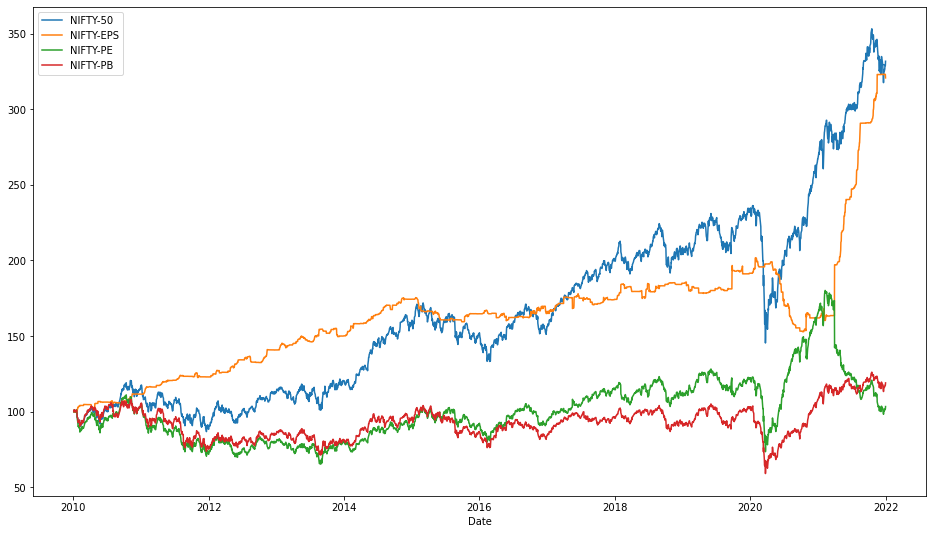

In [8]:
nifty.plot.line(figsize=(16,9))